In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#pd.options.display.float_format = '{:20,.2f}'.format

In [14]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Распределение стоимости стоимости недвижимости

Text(0, 0.5, 'Количество объектов недвижимости')

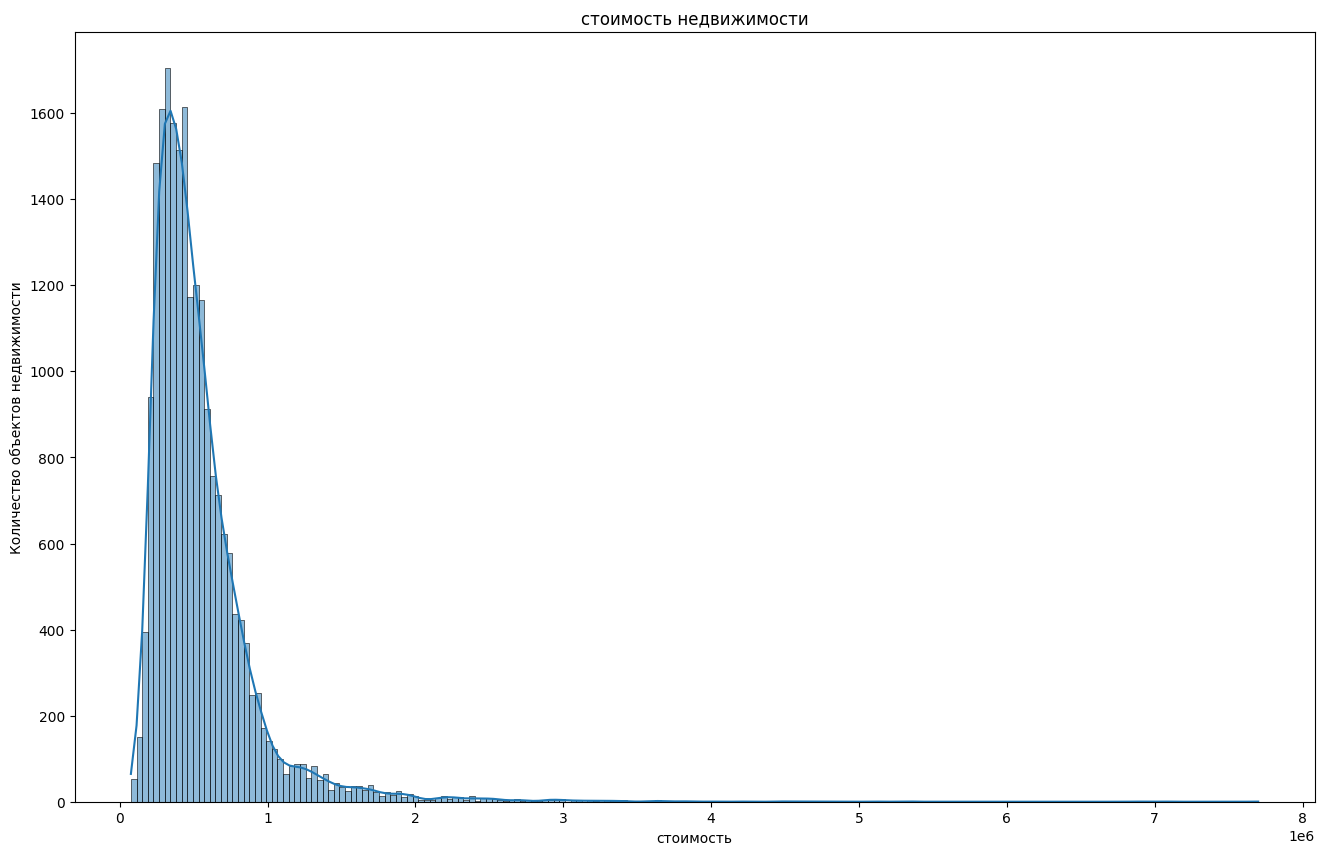

In [15]:
plt.figure(figsize=(16, 10))
sns.histplot(data=df,x="price",bins=200, kde = True)
plt.title('стоимость недвижимости')
plt.xlabel('стоимость')
plt.ylabel('Количество объектов недвижимости')

# Распределение квадратуры недвижимости

Text(0, 0.5, 'Количество объектов недвижимости')

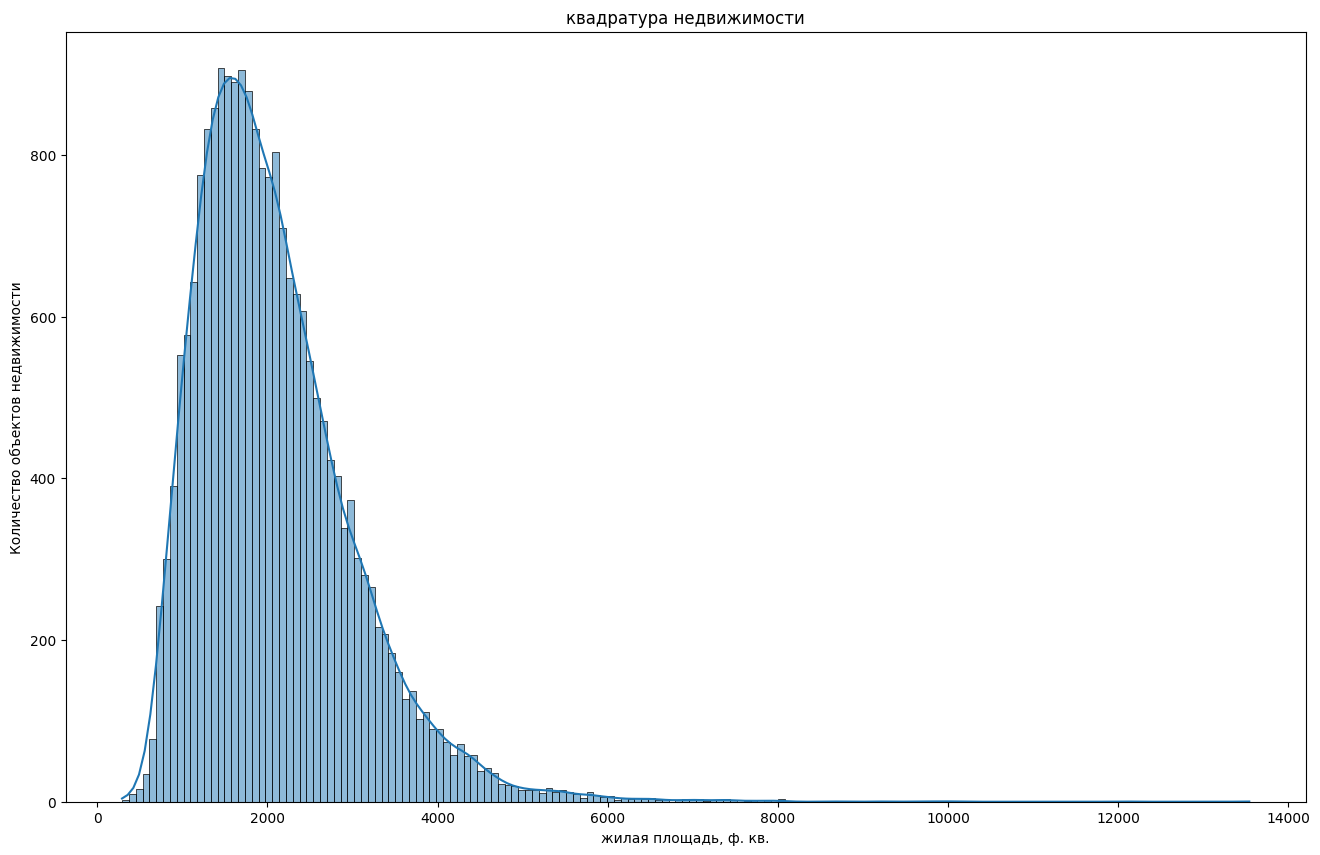

In [16]:
plt.figure(figsize=(16, 10))
sns.histplot(data=df,x="sqft_living", kde = True)
plt.title('квадратура недвижимости')
plt.xlabel('жилая площадь, ф. кв.')
plt.ylabel('Количество объектов недвижимости')

# Распределение по году постройки недвижимости

Text(0, 0.5, 'Количество объектов недвижимости')

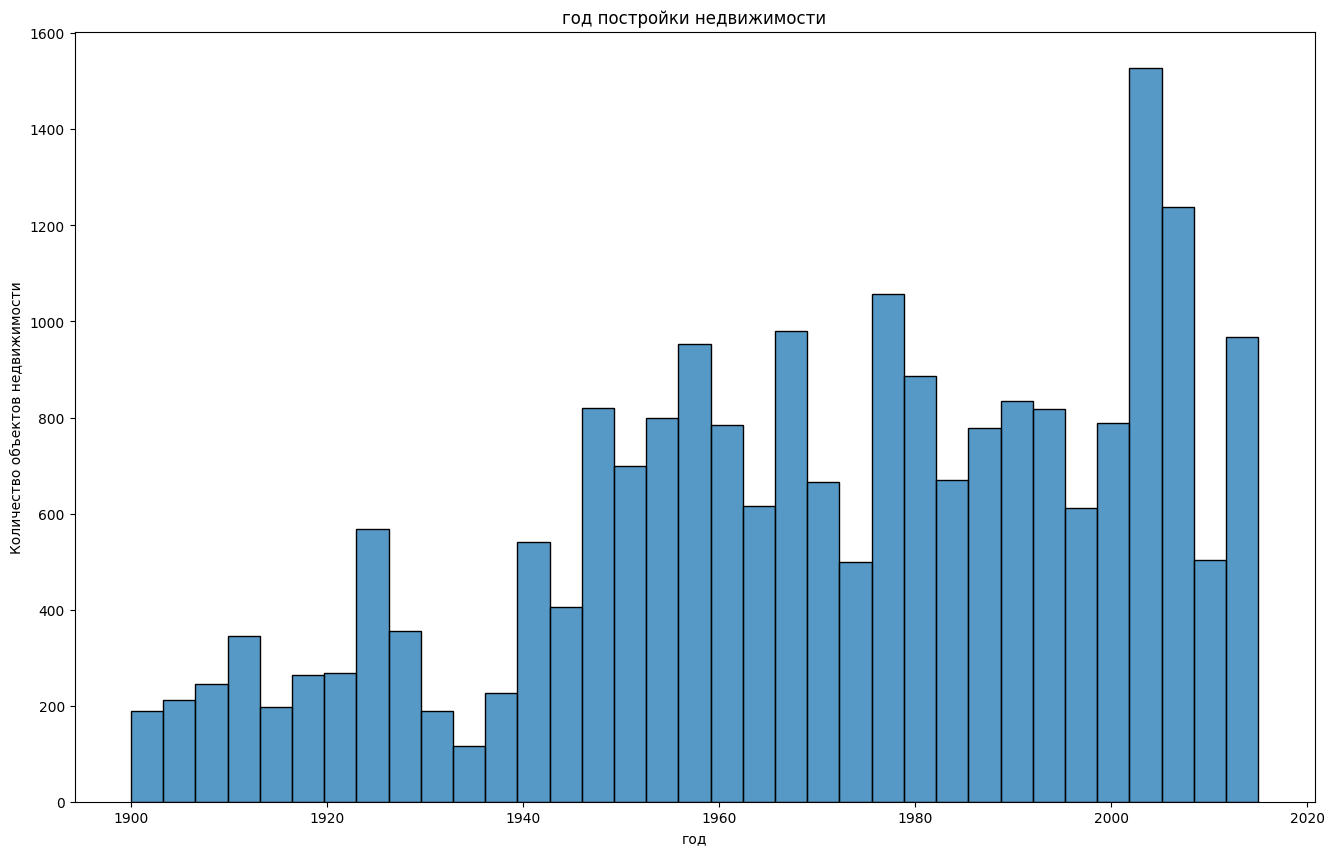

In [17]:
plt.figure(figsize=(16, 10))
sns.histplot(data=df,x="yr_built")
plt.title('год постройки недвижимости')
plt.xlabel('год')
plt.ylabel('Количество объектов недвижимости')

# Вид на набережную

In [22]:
water = df["waterfront"].value_counts()
water.head()

0    21450
1      163
Name: waterfront, dtype: int64

In [23]:
names = water.index
values = water.values
nam=[]
for i in names:
    if names[i]==1:
        nam.append('Да')
    else:
        nam.append('Нет')       


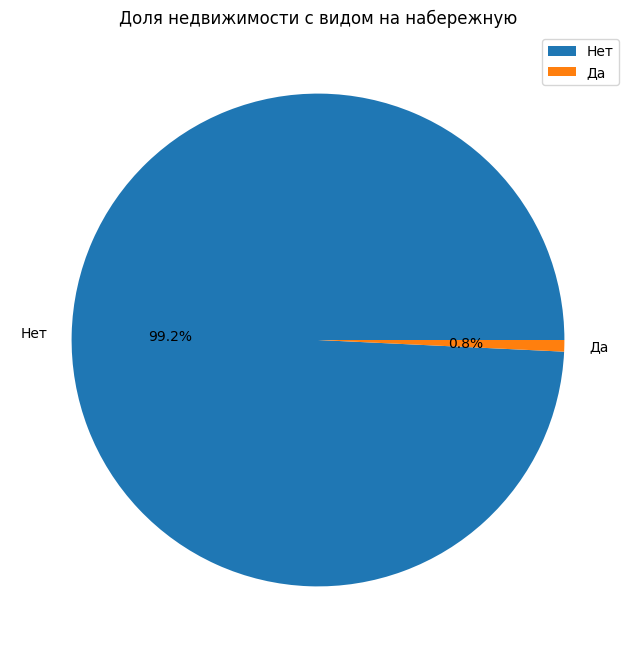

In [24]:
plt.figure(figsize=(10, 8))
plt.pie(values, autopct='%1.1f%%', labels=nam)
plt.title('Доля недвижимости с видом на набережную')
plt.legend(nam, loc='upper right');

# Этажность

In [25]:
flo = df["floors"].value_counts()
flo.head()

1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
Name: floors, dtype: int64

In [26]:
fnames = flo.index
fvalues = flo.values

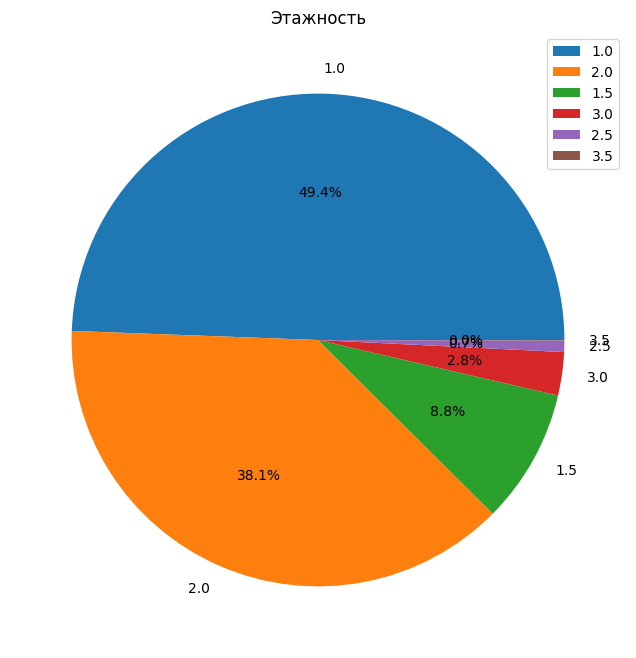

In [27]:
plt.figure(figsize=(10, 8))
plt.pie(fvalues, autopct='%1.1f%%', labels=fnames)
plt.title('Этажность')
plt.legend(fnames, loc='upper right');

# Состояние недвижимости

In [28]:
cond = df["condition"].value_counts()
cond.head()

3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64

In [29]:
cnames = cond.index
cvalues = cond.values

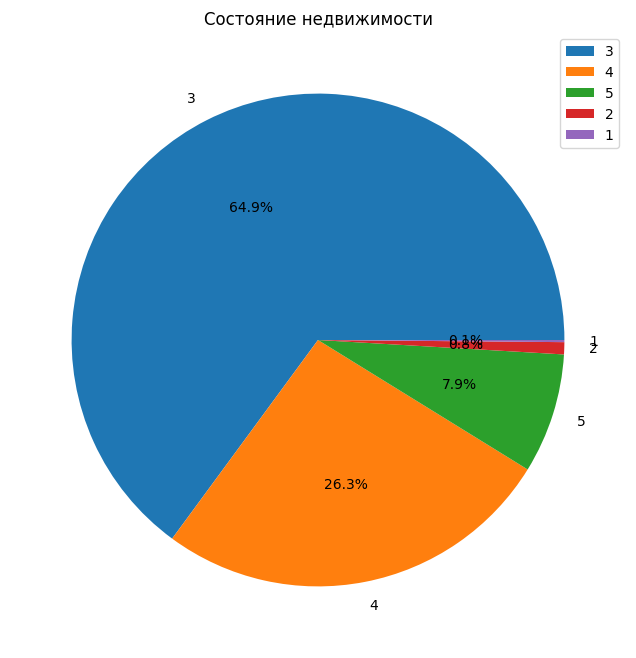

In [30]:
plt.figure(figsize=(10, 8))
plt.pie(cvalues, autopct='%1.1f%%', labels=cnames)
plt.title('Состояние недвижимости')
plt.legend(cnames, loc='upper right');

# Влияние факторов на стоимость недвижимости

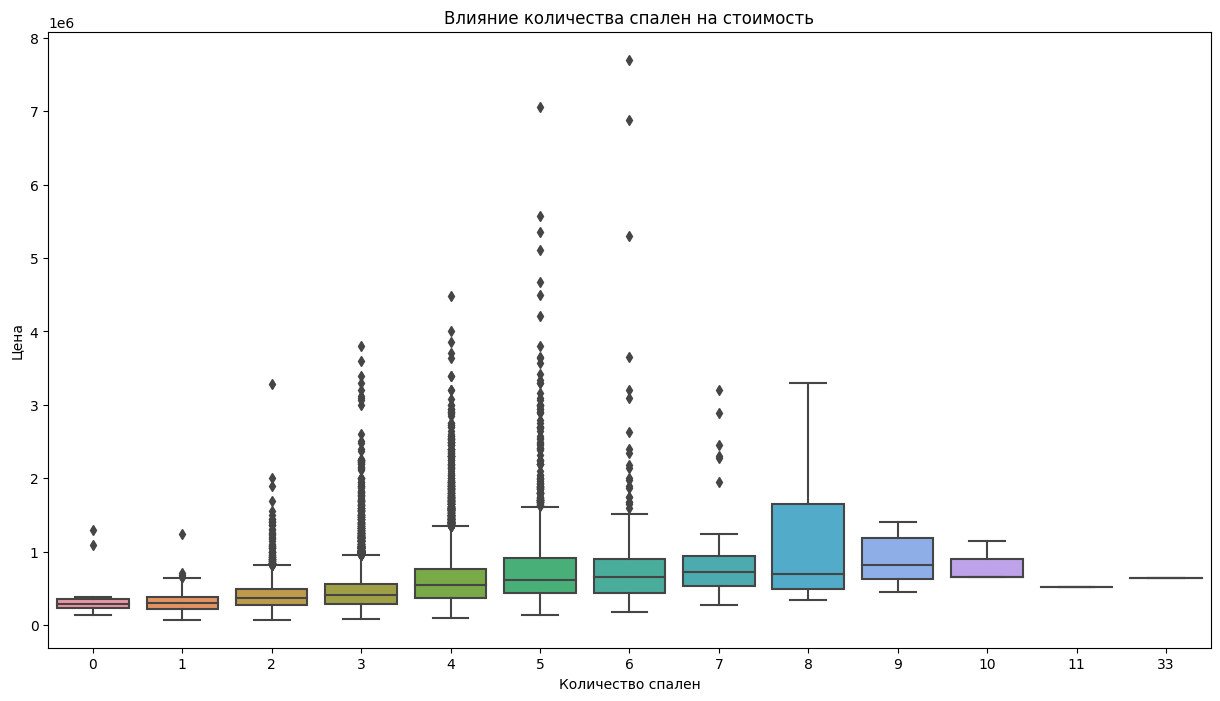

In [31]:
plt.figure(figsize=(15,8))
sns.boxplot(x=df["bedrooms"], y=df["price"], whis=1.5)
plt.title('Влияние количеcтва спален на стоимость')
plt.xlabel("Количество спален")
plt.ylabel("Цена");

Выводы: Стоимость недвижимости связана с количеством спален в доме, чем их количество больше тем выше стоимость.

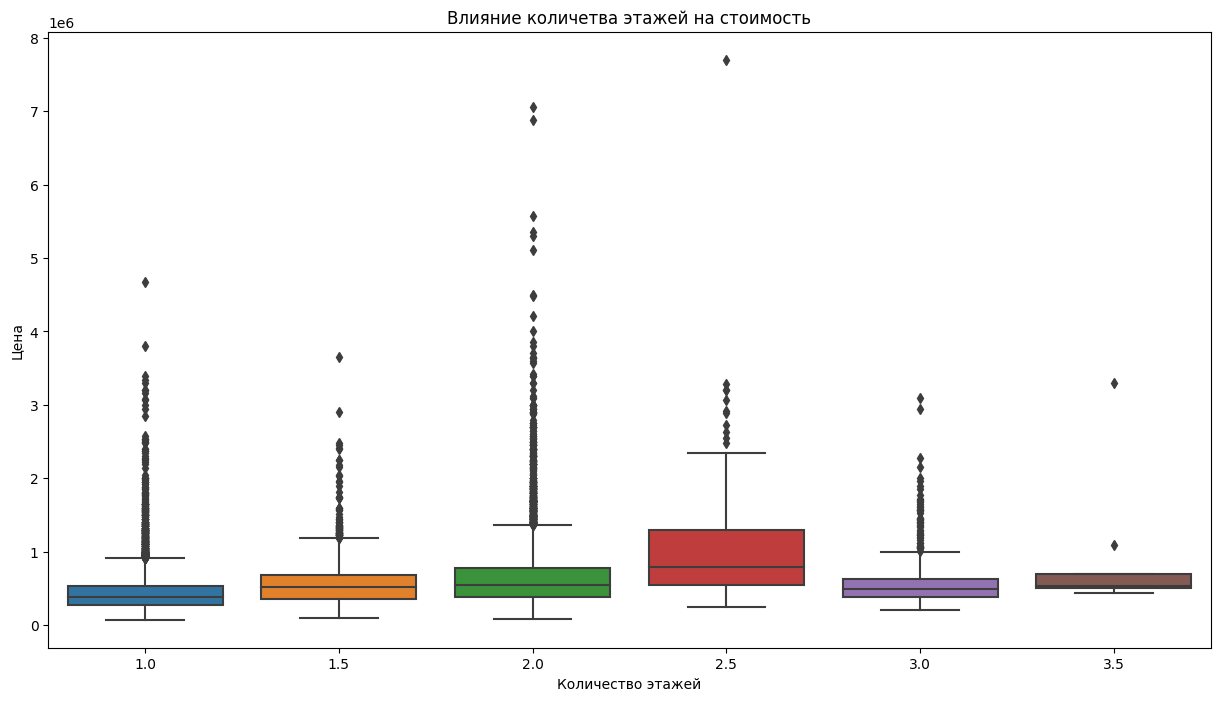

In [32]:
plt.figure(figsize=(15,8))
sns.boxplot(x=df["floors"], y=df["price"], whis=1.5)
plt.title('Влияние количетва этажей на стоимость')
plt.xlabel("Количество этажей")
plt.ylabel("Цена");

Выводы: Этажность недвижимости неначительно влияет на её стоимость. Наибльшую стоимость имеют двухэтажные дома с дополнитеьным мансардным этажём.

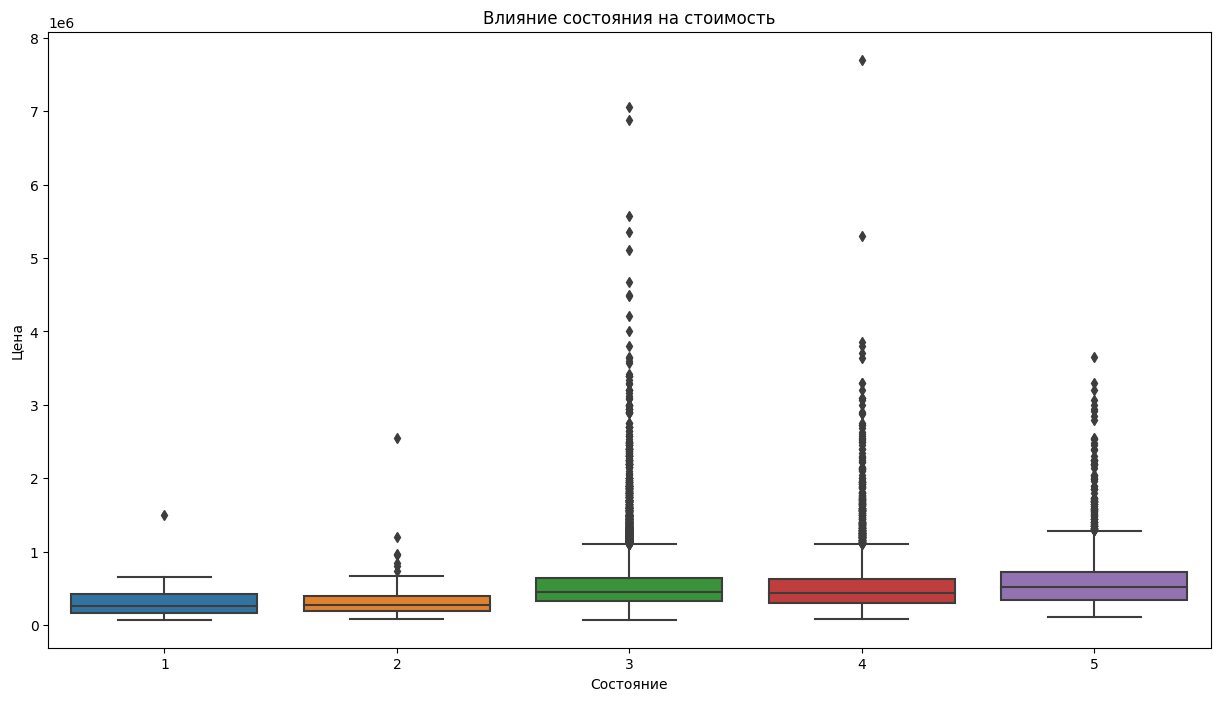

In [33]:
plt.figure(figsize=(15,8))
sns.boxplot(x=df["condition"], y=df["price"], whis=1.5)
plt.title('Влияние состояния на стоимость')
plt.xlabel("Состояние")
plt.ylabel("Цена");

Выводы: Для недвижимости с низкой оценкой состояния (1 и 2) разница в стоимости не значительна. Тоже можно сказать и о недвижимостити с оценками состояния 3 и 4. В целом боллее высокая оценка состояния недвижимости обуславливает большую её стоимость.

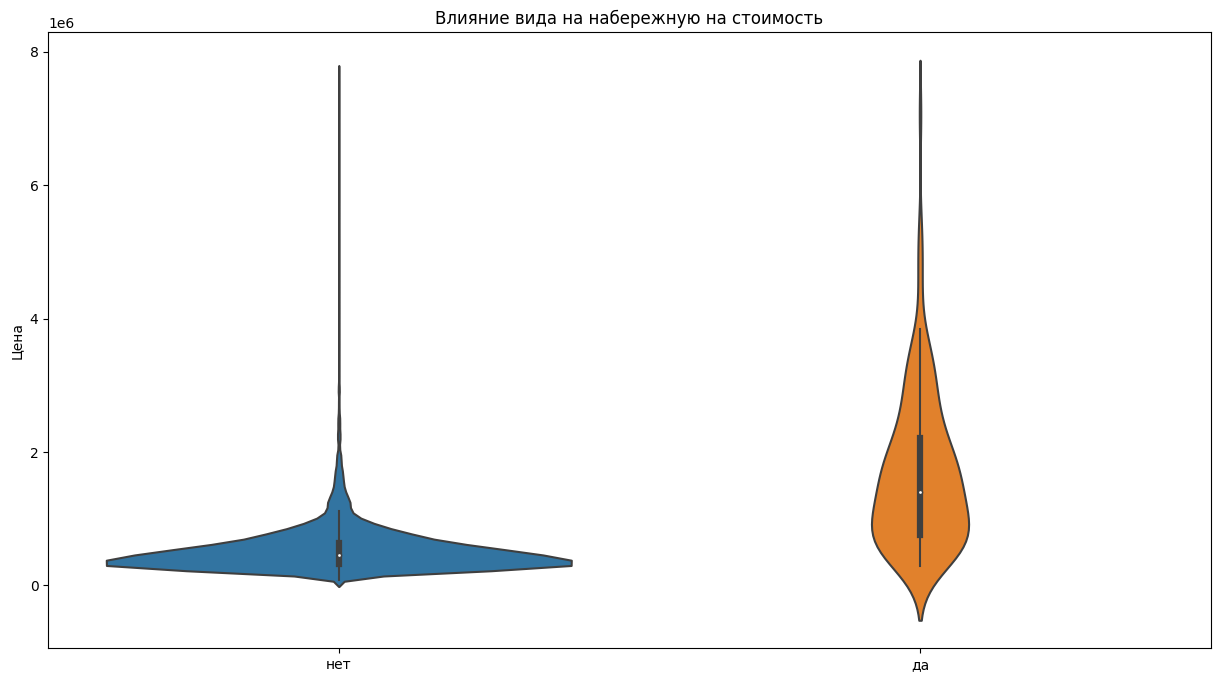

In [34]:
plt.figure(figsize=(15,8))
sns.violinplot(x=df["waterfront"].replace({0:'нет',1:'да'}), y=df["price"], whis=1.5)
plt.title('Влияние вида на набережную на стоимость')
plt.xlabel("")
plt.ylabel("Цена");


Выводы: Наличие вида на набережную обуславливает более высокую среднюю стоимость недвижимости, при этом недвижимость без вида на набережную имеет более выраженный количестенный максимум, соответствующий некой средней цене.   


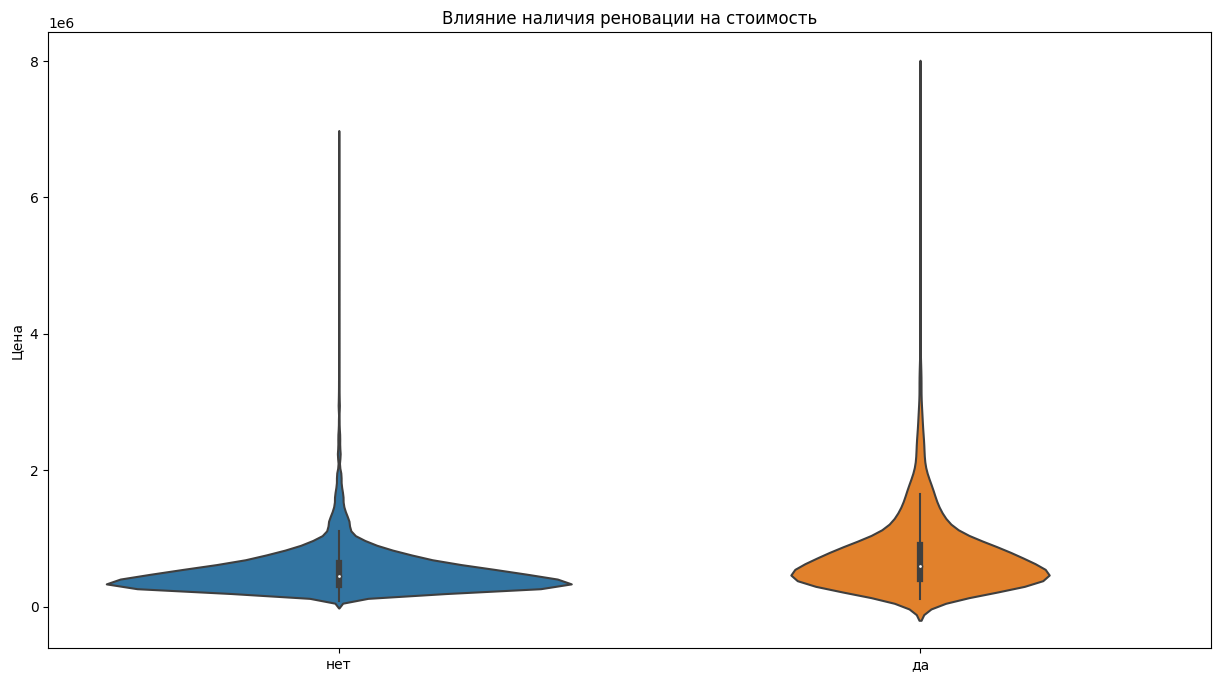

In [36]:
def stat_renovation(x):
    if x>0:
        return 'да'
    else:
        return 'нет'
    
plt.figure(figsize=(15,8))
sns.violinplot(x=df['yr_renovated'].apply(stat_renovation), y=df["price"], whis=1.5)
plt.title('Влияние наличия реновации на стоимость')
plt.xlabel("")
plt.ylabel("Цена");


Выводы: Проведённая реновация незначительно влияет на стоимость недвижимости, хотя и обуславливает несколько более высокие цены.  